# scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

只读取两类数据,是二分类问题

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# 二分类问题
X = X[y<2,:2]
y = y[y<2]

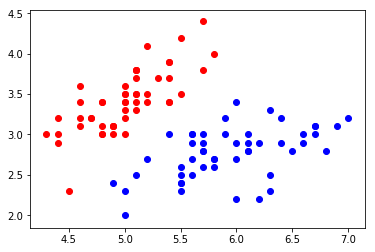

In [4]:
plt.scatter(X[y==0,0],X[y==0,1],color='red') # 分类一的数据点
plt.scatter(X[y==1,0],X[y==1,1],color='blue') # 分类二的数据点
plt.show()

首先数据标准归一化

In [6]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
X_standard[:10]

array([[-0.5810659 ,  0.85713543],
       [-0.89430898, -0.19845007],
       [-1.20755205,  0.22378413],
       [-1.36417359,  0.01266703],
       [-0.73768744,  1.06825253],
       [-0.11120129,  1.70160383],
       [-1.36417359,  0.64601833],
       [-0.73768744,  0.64601833],
       [-1.67741667, -0.40956718],
       [-0.89430898,  0.01266703]])

### 使用线性SVM的分类模型

In [7]:
from sklearn.svm import LinearSVC  # C 是classify 的意思

svc = LinearSVC(C=1e9) # 这里的参数C 是一个超参数
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

画图专用的函数

In [8]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


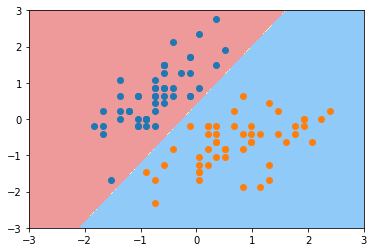

In [9]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

### 改变超参数 C=0.01

In [10]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


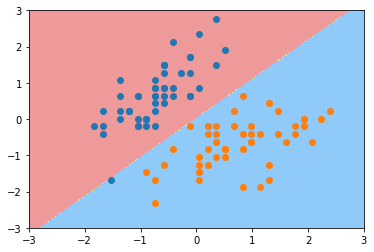

In [11]:
plot_decision_boundary(svc2,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [14]:
svc.coef_ # 2维矩阵, 但只有一个元素

array([[ 4.03243637, -2.49295719]])

In [13]:
svc.intercept_

array([0.95368115])

画出SVC的决策边界的直线

In [16]:
def plot_svc_decision_boundary(model, axis):
    """画出SVC的决策边界的直线"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    # 获取系数
    w = model.coef_[0]
    #获取截矩
    b = model.intercept_[0]
    
    # 原方程: w0*x0 + w1*x1 + b = 0
    # 变换后: => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0],axis[1],200) # x轴200个点
    # 直线 y 上面的直线up_y: x1 = -w0/w1 * x0 - b/w1 + 1/w[1]
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    # 直线 y 下面的直线down_y: x1 = -w0/w1 * x0 - b/w1 - 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    # 限定不在y轴可视范围内的
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    # 画直线 up_y, down_y
    plt.plot(plot_x[up_index],up_y[up_index],color='black')
    plt.plot(plot_x[down_index],down_y[down_index],color='black')

模型实例 svc 

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


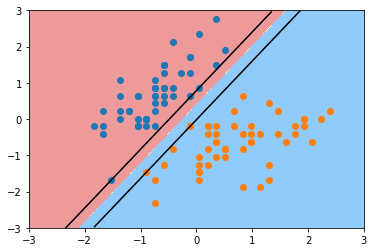

In [18]:
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1]) # 分类一
plt.scatter(X_standard[y==1,0],X_standard[y==1,1]) # 分类二
plt.show()

模型实例 svc2

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


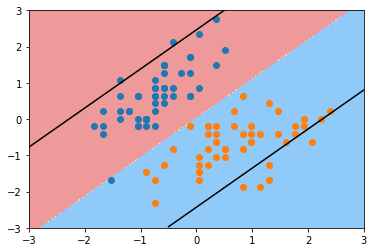

In [20]:
plot_svc_decision_boundary(svc2,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1]) # 分类一
plt.scatter(X_standard[y==1,0],X_standard[y==1,1]) # 分类二
plt.show()